# Stochastic Processes: <br>Data Analysis and Computer Simulation
<br>


# Python programming for beginners
<br>

# 4. Simulating a damped harmonic oscillator
<br>

# 4.1. A damped harmonic oscillator

## Model system

![](fig/damped_oscillator.png) 

## Time evolution equations

$$
\frac{d\mathbf{R}(t)}{dt} =\mathbf{V}(t)\hspace{17mm} \tag{B1}
$$

$$
m\frac{d\mathbf{V}(t)}{dt}=-\zeta\mathbf{V}(t)-k\mathbf{R}(t) \tag{B2}
$$

# 4.2. Computer simulation

## Euler method

- Use Eq.(A8) in the previous lessen

$$
\mathbf{R}_{i+1}=\mathbf{R}_i+\int_{t_i}^{t_{i+1}} dt\mathbf{V}(t)\simeq\mathbf{R}_i+\mathbf{V}_i \Delta t \hspace{15mm}\tag{B3}
$$

$$
\mathbf{V}_{i+1}=\mathbf{V}_i-\frac{\zeta}{m}\int_{t_i}^{t_{i+1}} dt\mathbf{V}(t)-\frac{k}{m}\int_{t_i}^{t_{i+1}} dt\mathbf{R}(t)
$$
$$
\simeq\left(1-\frac{\zeta}{m}\Delta t\right)\mathbf{V}_i - \frac{k}{m} \mathbf{R}_i \Delta t \hspace{12mm}\tag{B4}
$$

## Import libraries

In [3]:
% matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('ggplot')

## Define variables

In [4]:
dim  = 2    # system dimension (x,y)
nums = 1000 # number of steps
R    = np.zeros(dim) # particle position
V    = np.zeros(dim) # particle velocity
Rs   = np.zeros([dim,nums]) # particle position (at all steps)
Vs   = np.zeros([dim,nums]) # particle velocity (at all steps)
Et   = np.zeros(nums) # total enegy of the system (at all steps)
time = np.zeros(nums) # time (at all steps)

## Define functions

In [5]:
def init(): # initialize animation
    particles.set_data([], [])
    line.set_data([], [])
    title.set_text(r'')
    return particles,line,title
def animate(i): # define amination using Euler
    global R,V,F,Rs,Vs,time,Et
    R, V = R+V*dt, V*(1-zeta/m*dt)-k/m*dt*R # Euler method Eqs.(B3)&(B4)
    Rs[0:dim,i]=R
    Vs[0:dim,i]=V
    time[i]=i*dt
    Et[i]=0.5*m*np.linalg.norm(V)**2+0.5*k*np.linalg.norm(R)**2
    particles.set_data(R[0], R[1])      # current position
    line.set_data(Rs[0,0:i], Rs[1,0:i]) # add latest position Rs
    title.set_text(r"$t = {0:.2f},E_T = {1:.3f}$".format(i*dt,Et[i]))
    return particles,line,title

## Perform the simulation

<IPython.core.display.Javascript object>


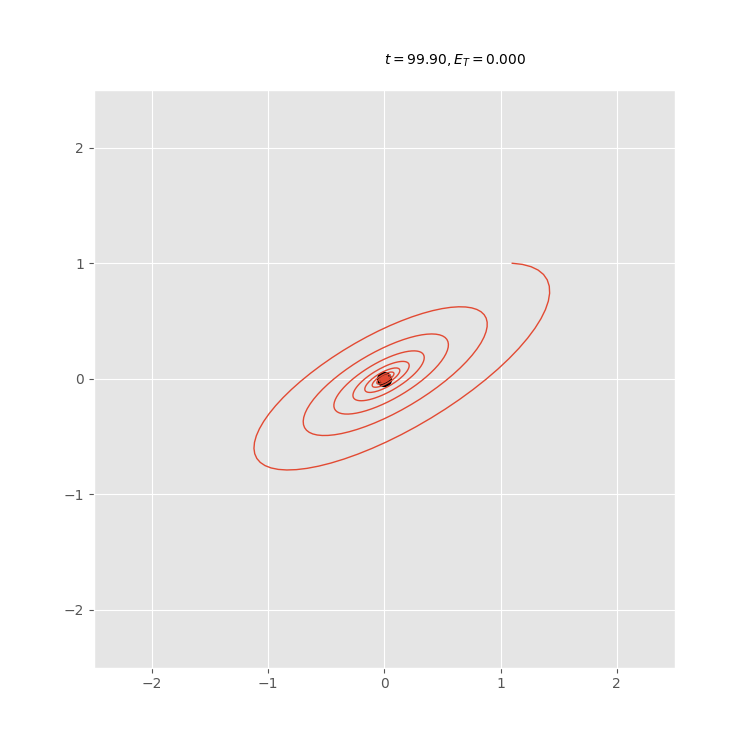

In [6]:
# System parameters
# particle mass, spring & friction constants
m, k, zeta = 1.0, 1.0, 0.25
# Initial condition
R[0], R[1] = 1., 1. # Rx(0), Ry(0)
V[0], V[1] = 1., 0. # Vx(0), Vy(0)
dt   = 0.1*np.sqrt(k/m) # set \Delta t
box  = 5 # set size of draw area
# set up the figure, axis, and plot element for animatation
fig, ax = plt.subplots(figsize=(7.5,7.5)) # setup plot
ax = plt.axes(xlim=(-box/2,box/2),ylim=(-box/2,box/2)) # draw range
particles, = ax.plot([],[],'ko', ms=10) # setup plot for particle 
line,=ax.plot([],[],lw=1) # setup plot for trajectry
title=ax.text(0.5,1.05,r'',transform=ax.transAxes,va='center') # title
anim=animation.FuncAnimation(fig,animate,init_func=init,
     frames=nums,interval=5,blit=True,repeat=False) # draw animation
# anim.save('movie.mp4',fps=20,dpi=400)

## Analyze the simulation results 

### Temporal values of $R_x(t)$, $R_y(t)$, $E_T(t)$ 

- Total energy of the harmonic oscillator
$$
E_T(t)=E_{kinetic}(t) + E_{potential}(t) = \frac{1}{2}m\mathbf{V}^2(t)+\frac{1}{2}k\mathbf{R}^2(t)
$$

<IPython.core.display.Javascript object>


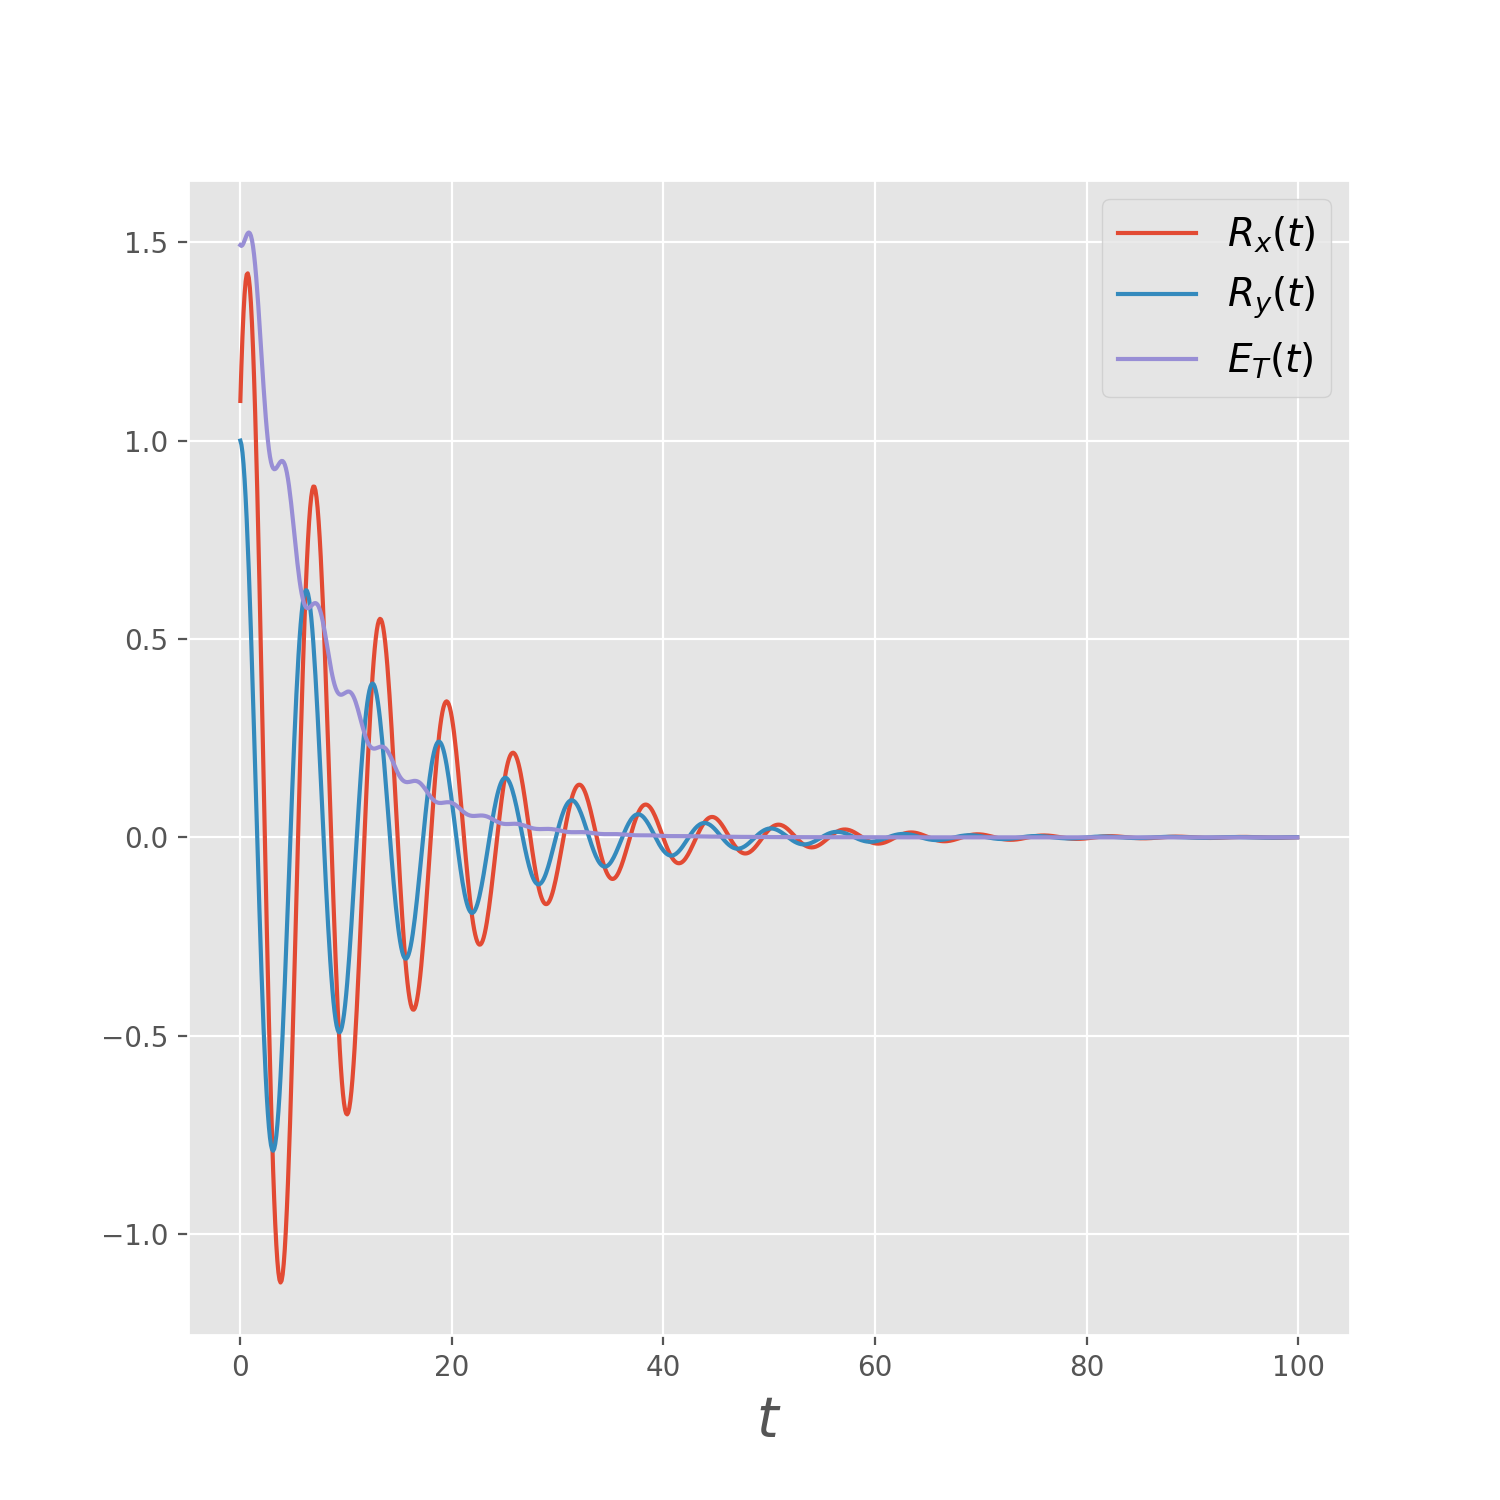

In [5]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.plot(time,Rs[0]) # plot R_x(t)
ax.plot(time,Rs[1]) # plot R_y(t)
ax.plot(time,Et) # plot E(t) (ideally constant if \deta=0)
ax.legend([r'$R_x(t)$',r'$R_y(t)$',r'$E_T(t)$'], fontsize=14)
plt.show()

### Trajectory plot

<IPython.core.display.Javascript object>


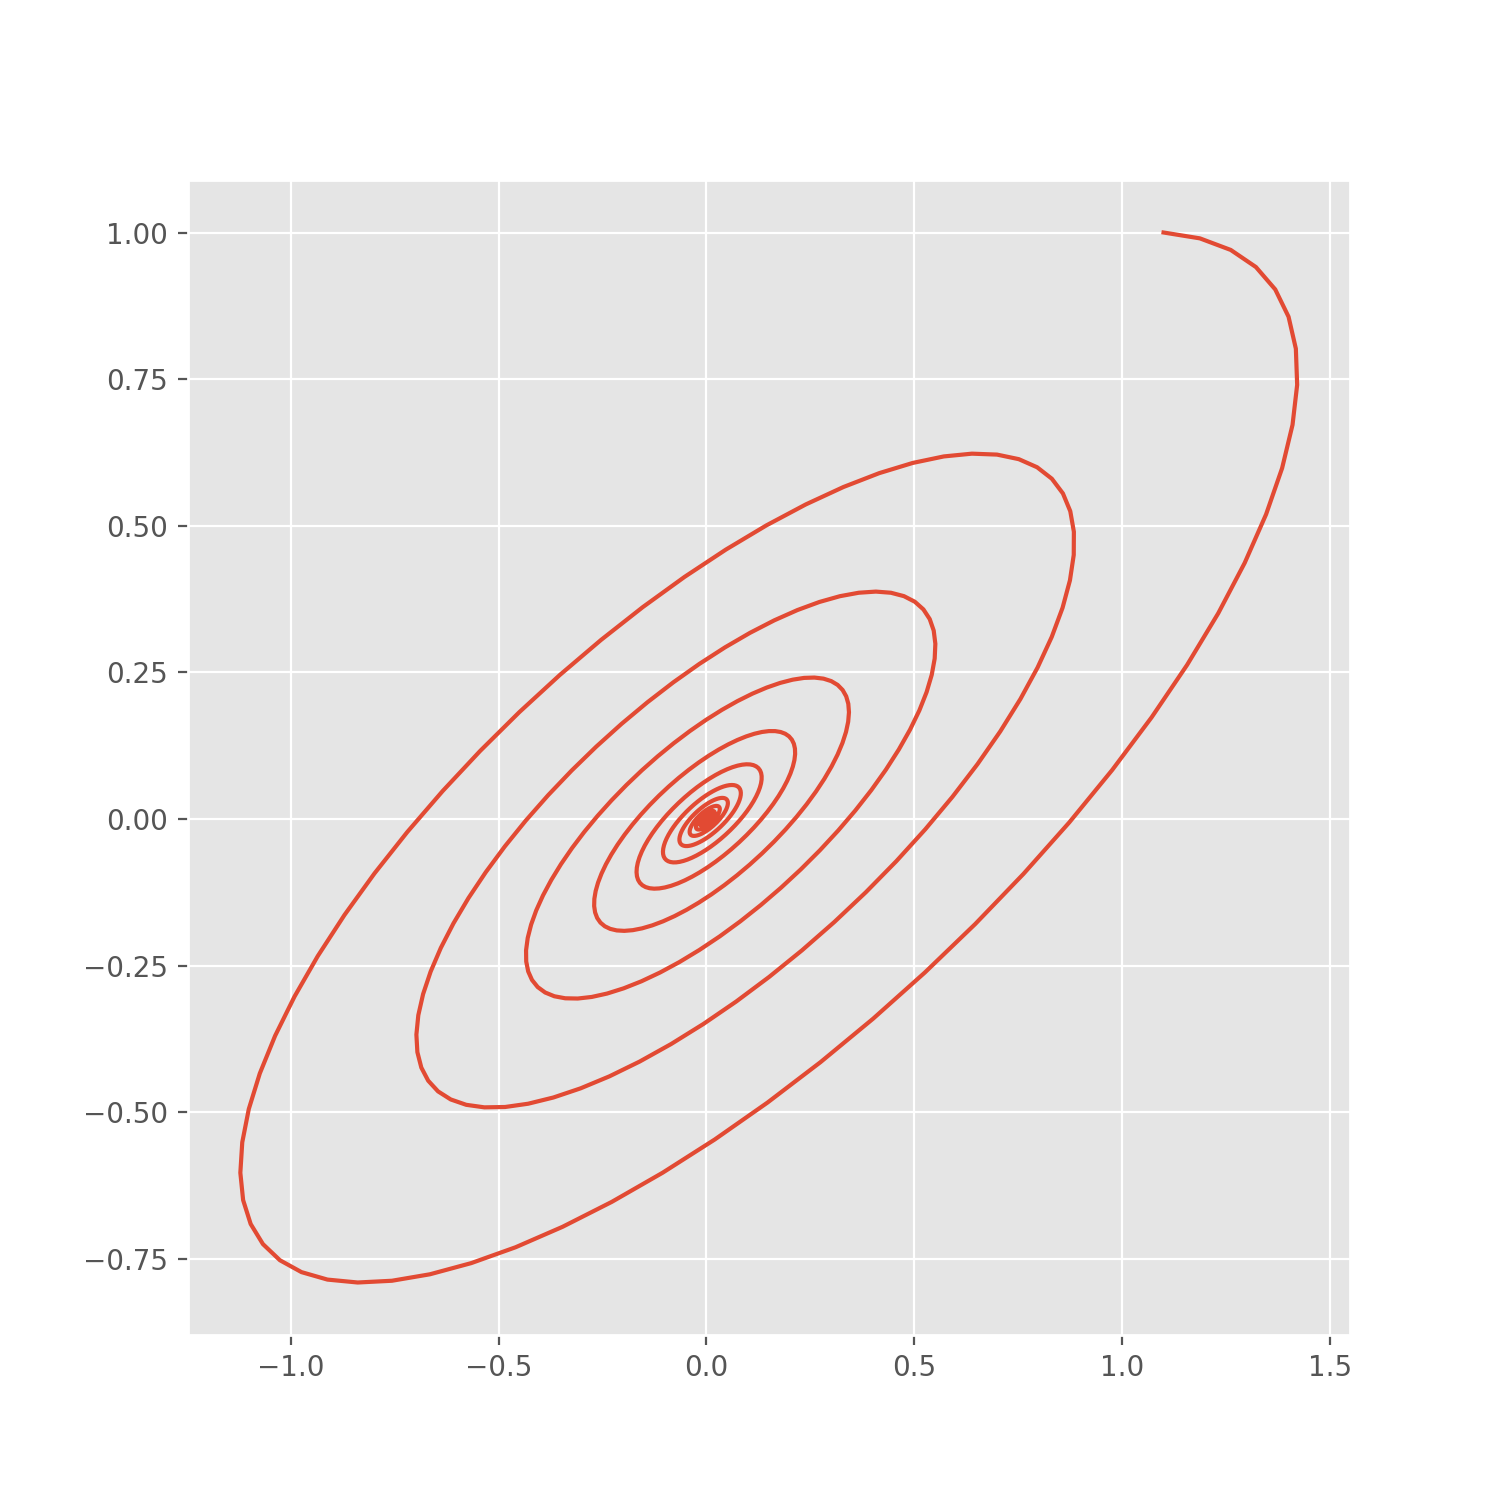

In [6]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.plot(Rs[0,0:nums],Rs[1,0:nums]) # parameteric plot Rx(t) vs. Ry(t)
plt.show()

# Supplemental Note: Simulation schemes with other methods

- The original Euler method is not correctly applicable to the oscillator problem unless the friction constant is sufficiently large. In general, oscillator problems have to be solved with higher order methods such as the Runge-Kutta or the Leap-Frog shown below.

## Runge-Kutta 2nd order method

- Use Eqs.(A15) and (A16) in the previous lessen

$$
\mathbf{R}'_{i+\frac{1}{2}}=
\mathbf{R}_i+\frac{\Delta t}{2}\mathbf{V}_{i} \hspace{15mm}\tag{B5}
$$

$$
\mathbf{V}'_{i+\frac{1}{2}}=
\mathbf{V}_i-\frac{\zeta}{m}\frac{\Delta t}{2}\mathbf{V}_{i} - \frac{k}{m} \frac{\Delta t}{2}\mathbf{R}_{i}  \hspace{12mm}\tag{B6}
$$

$$
\mathbf{R}_{i+1}=
\mathbf{R}_i+\Delta t\mathbf{V}'_{i+\frac{1}{2}} \hspace{15mm}\tag{B7}
$$

$$
\mathbf{V}_{i+1}=
\mathbf{V}_i-\frac{\zeta}{m}\Delta t\mathbf{V}'_{i+\frac{1}{2}} - \frac{k}{m} \Delta t\mathbf{R}'_{i+\frac{1}{2}}  \hspace{12mm}\tag{B8}
$$


## Runge-Kutta 4th order method
- Use Eqs.(A18) - (A21) in the previous lessen
$$
\mathbf{R}'_{i+\frac{1}{2}}=
\mathbf{R}_i+\frac{\Delta t}{2}\mathbf{V}_{i} \hspace{15mm}\tag{B9}
$$
$$
\mathbf{V}'_{i+\frac{1}{2}}=
\mathbf{V}_i-\frac{\zeta}{m}\frac{\Delta t}{2}\mathbf{V}_{i} - \frac{k}{m} \frac{\Delta t}{2}\mathbf{R}_{i}  \hspace{12mm}\tag{B10}
$$
$$
\mathbf{R}''_{i+\frac{1}{2}}=
\mathbf{R}_i+\frac{\Delta t}{2}\mathbf{V}'_{i+\frac{1}{2}} \hspace{15mm}\tag{B11}
$$
$$
\mathbf{V}''_{i+\frac{1}{2}}=
\mathbf{V}_i-\frac{\zeta}{m}\frac{\Delta t}{2}\mathbf{V}'_{i+\frac{1}{2}} - \frac{k}{m} \frac{\Delta t}{2}\mathbf{R}'_{i+\frac{1}{2}}  \hspace{12mm}\tag{B12}
$$
$$
\mathbf{R}'''_{i+1}=
\mathbf{R}_i+{\Delta t}\mathbf{V}''_{i+\frac{1}{2}} \hspace{15mm}\tag{B13}
$$
$$
\mathbf{V}'''_{i+1}=
\mathbf{V}_i-\frac{\zeta}{m}\Delta t\mathbf{V}''_{i+\frac{1}{2}} - \frac{k}{m} \Delta t\mathbf{R}''_{i+\frac{1}{2}}  \hspace{12mm}\tag{B14}
$$
$$
\mathbf{R}_{i+1}=
\mathbf{R}_i+\frac{\Delta t}{6}\left(\mathbf{V}_{i}+2\mathbf{V}'_{i+\frac{1}{2}}+2\mathbf{V}''_{i+\frac{1}{2}}+\mathbf{V}'''_{i+1}\right) \hspace{15mm}\tag{B15}
$$
$$
\mathbf{V}_{i+1}=
\mathbf{V}_i-\frac{\zeta}{m}\frac{\Delta t}{6}\left(\mathbf{V}_{i}+2\mathbf{V}'_{i+\frac{1}{2}}+2\mathbf{V}''_{i+\frac{1}{2}}+\mathbf{V}'''_{i+1}\right) 
$$
$$
\hspace{15mm}- \frac{k}{m} \frac{\Delta}{6} t\left(\mathbf{R}_{i}+2\mathbf{R}'_{i+\frac{1}{2}}+2\mathbf{R}''_{i+\frac{1}{2}}+\mathbf{R}'''_{i+1}\right)  \hspace{12mm}\tag{B16}
$$

## Leap-Frog method
- Use Eqs.(A11) - (A14) in the previous lessen
$$
\mathbf{V}_{i,n+\frac{1}{2}}
=\mathbf{V}_{i,n-\frac{1}{2}}-\frac{\zeta}{m}\Delta t\mathbf{V}_{i,n}  - \frac{k}{m}\mathbf{R}_{i,n}\Delta t \\
\hspace{45mm}=\mathbf{V}_{i,n-\frac{1}{2}}-\frac{\zeta}{m}\Delta t\frac{1}{2}\left(
\mathbf{V}_{i,n+\frac{1}{2}}+\mathbf{V}_{i,n-\frac{1}{2}}
\right)  - \frac{k}{m}\mathbf{R}_{i,n}\Delta t
$$

$$
\therefore\ \ \ \mathbf{V}_{i,n+\frac{1}{2}}
=\left(\left(1-\frac{\zeta}{2m}\Delta t\right)\mathbf{V}_{i,n-\frac{1}{2}}
- \frac{k}{m}\mathbf{R}_{i,n}\Delta t \right)\left(1+\frac{\zeta}{2m}\Delta t\right)^{-1}
\tag{B17}
$$


$$
\mathbf{R}_{i,n+1}=\mathbf{R}_{i,n}+\mathbf{V}_{i,n+\frac{1}{2}}\Delta t  \hspace{15mm}\tag{B18}
$$

- The following equation is needed only when you need to know $\mathbf{R}_{i,n+\frac{1}{2}}$, for example to calculate the temporal total energy $E(t)$ at $t_{n+\frac{1}{2}}$.

$$
\mathbf{R}_{i,n+\frac{1}{2}}
=\frac{1}{2}\left(\mathbf{R}_{i,n+1}+\mathbf{R}_{i,n}\right)
\tag{B19}
$$
